![molprop](https://storage.googleapis.com/polaris-public/icons/icons8-fox-60-kinases.png)

# Benchmarks for RET & mutants

## Background
**RET (Rearranged during Transfection)** is a proto-oncogene that codes for a receptor tyrosine kinase. This means it produces a protein that plays a role in signaling pathways within cells, particularly related to cell growth and differentiation. When activated, RET helps regulate cell survival, proliferation, and differentiation. Mutations or alterations in the RET gene can lead to uncontrolled cell growth and potentially the development of cancer.

## Benchmarking
**RET wild type**: In some cases, targeting both mutant and wild-type RET together can be more effective than targeting only one form as Combination Therapies. In certain cancer types, such as some subtypes of non-small cell lung cancer (NSCLC), the RET signaling pathway can interact with other oncogenic pathways, such as the EGFR (epidermal growth factor receptor) pathway. Targeting both pathways simultaneously might offer a synergistic effect and improve treatment outcomes. 

**RET-V804L**: The V804L mutation causes a structural change in the RET protein, resulting in its continuous activation, even in the absence of ligand binding. The mutation leads to uncontrolled cell growth and division, contributing to oncogenesis. The V804L mutation in RET has been identified in various cancer types, particularly in thyroid cancers, including papillary thyroid carcinoma (PTC) and medullary thyroid carcinoma (MTC). It is often associated with aggressive tumor behavior and resistance to conventional therapies. 

**RET-Y791F**: The Y791F mutation disrupts a crucial phosphorylation site within the RET protein. Consequently, the tyrosine at position 791 cannot be phosphorylated effectively or at all. This disruption interferes with the normal signaling pathways that rely on this particular phosphorylation event, leading to dysregulated downstream signaling, such as MAPK and PI3K. The Y791F mutation, by abrogating this phosphorylation site, alters these cellular responses and may influence tumor development and progression. The Y791F mutation is found in the RET protein, which is implicated in several types of cancer, particularly medullary thyroid carcinoma (MTC).

**The goal** of this benchmark is to select the best predictive model for 
- Selectivity towards the mutants
- Optimization of the bioactivity % inhibition.
- Discovery of potential hits in new chemical space.


## Description of readout 
**Description of readout:**
- **Readouts**: `RET`, `RET_(V804L_mutant)`, `RET_(Y791F_mutant)`
- **Bioassay readout**: Percentage of inhibition.
- **Optimization objective**: Higher value (higher %inhibition ).

## Data resource: 
- **Reference**: [PKIS1](https://pubmed.ncbi.nlm.nih.gov/26501955)


## Train/test split
Given the benchmarking goal, a scaffold-based splitting approach was applied to ensure training and test sets contain distinct chemical structures while maintaining the diversity of scaffolds.


In [1]:
import pandas as pd
import datamol as dm
import numpy as np
from sklearn.model_selection import ShuffleSplit
import polaris
from polaris.curation._chemistry_curator import SMILES_COL, UNIQUE_ID
from polaris.dataset import Dataset, ColumnAnnotation
from polaris.benchmark import SingleTaskBenchmarkSpecification, MultiTaskBenchmarkSpecification

import os
import pathlib
os.chdir(pathlib.Path("__file__").absolute().parents[2])
from utils import *

/Users/lu.zhu/miniconda3/envs/pov3/lib/python3.11/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/lu.zhu/miniconda3/envs/pov3/lib/python3.11/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/lu.zhu/miniconda3/envs/pov3/lib/python3.11/site-packages/umap/d

In [2]:
BENCHMARK_DIR = "gs://polaris-public/benchmarks/kinases/ret"
FIGURE_DIR = "gs://polaris-public/datasets/kinases/ret/figures"

### Load existing data
> **Attention:** \
> The original dataset is published in https://pubmed.ncbi.nlm.nih.gov/26501955 \
> 
> To **maintain consistency** with other benchmarks in the Polaris Hub, a thorough data curation process is carried out to ensure the accuracy of molecular presentations.
> Therefore, the raw data from the data resource is not used here. 
> See more curation details [here](https://github.com/polaris-hub/polaris-recipes/blob/mvp/03_Kinases/RET/mutants).


In [3]:
# Load data
dataset = polaris.load_dataset("gs://polaris-public/datasets/kinases/pkis1_subset_curated /pkis1_egfr_ret_kit_v1/dataset.json")

In [4]:
dataset

{
  "name": "pkis1_egfr_ret_kit_v1",
  "description": "A subset of PKIS dataset only including EGFR, RET, KIT kinases. PKIS is a data set of 367 small-molecule ATP-competitive kinase inhibitors that was screened by the set in activity assays with 224 recombinant kinases and 24 G protein-coupled receptors and in cellular assays of cancer cell proliferation and angiogenesis.",
  "tags": [
    "Kinase",
    "HitDiscovery",
    "Selectivity"
  ],
  "user_attributes": {},
  "owner": {
    "slug": "polaristest",
    "organization_id": "PolarisTest",
    "user_id": null,
    "owner": "PolarisTest"
  },
  "md5sum": "2f85307023559ce979218ee1e4d7e474",
  "readme": "![molprop](https://storage.googleapis.com/polaris-public/icons/icons8-fox-60-kinases.png)\n\n## Backgroud:\n Kinases play a crucial role in cellular signalling, making them important targets for drug development. Dysregulation of kinases is frequently implicated in diseases like cancer, inflammation, and neurodegenerative disorders. Therefore, targeting kinases with specific drugs has emerged as a crucial strategy in modern drug discovery. Kinase-related task includes inhibition prediction, selectivity prediction, or kinase-ligand binding affinity prediction. In the early release version of Polaris, benchmarks were established for kinases such as EGFR, KIT, and RET, along with their respective mutations, as well as for LOK and SLK.\n\n\n## Description of readout \n- **Readouts**:\n    - `EGFR`, `EGFR_(L858R_mutant)`, `EGFR_(L861Q_mutant)`, `EGFR_(T790M_mutant)`, `EGFR_(T790M-L858R_mutant)`\n    - `KIT`, `KIT_(D816V_mutant)`, `KIT_(T6701_mutant)`, `KIT_(V560G_mutant)`\n    - `RET`, `RET_(V804L_mutant)`, `RET_(Y791F_mutant)`\n    - `LOK`\n- **Bioassay readout**: Percentage of inhibition (%).\n- **Optimization objective**: Higher potency (higher %inhibition).\n\n\n## Data resource:\nPKIS 1: A set of 364 unique small-molecule ATP-competitive kinase inhibitors that was screened by the set in activity assays with 224 recombinant kinases and 24 G protein-coupled receptors and in cellular assays of cancer cell proliferation and angiogenesis.\n\n**Reference**: https://pubmed.ncbi.nlm.nih.gov/26501955\n\n<!-- ## Related benchmarks\nTODO: to be added -->",
  "annotations": {
    "UNIQUE_ID": {
      "is_pointer": false,
      "modality": "UNKNOWN",
      "description": null,
      "user_attributes": {}
    },
    "smiles": {
      "is_pointer": false,
      "modality": "MOLECULE",
      "description": null,
      "user_attributes": {}
    },
    "EGFR_(L858R_mutant)": {
      "is_pointer": false,
      "modality": "UNKNOWN",
      "description": null,
      "user_attributes": {
        "unit": "%",
        "concentration": "1uM",
        "organism": "Human",
        "objective": "Higher value",
        "source": "PKIS1",
        "mutation": "L858R_mutant",
        "target": "EGFR"
      }
    },
    "EGFR": {
      "is_pointer": false,
      "modality": "UNKNOWN",
      "description": null,
      "user_attributes": {
        "unit": "%",
        "concentration": "1uM",
        "organism": "Human",
        "objective": "Higher value",
        "source": "PKIS1",
        "mutation": "L858R_mutant",
        "target": "EGFR"
      }
    },
    "KIT_(T6701_mutant)": {
      "is_pointer": false,
      "modality": "UNKNOWN",
      "description": null,
      "user_attributes": {
        "unit": "%",
        "concentration": "1uM",
        "organism": "Human",
        "objective": "Higher value",
        "source": "PKIS1",
        "mutation": "L858R_mutant",
        "target": "KIT"
      }
    },
    "KIT_(V560G_mutant)": {
      "is_pointer": false,
      "modality": "UNKNOWN",
      "description": null,
      "user_attributes": {
        "unit": "%",
        "concentration": "1uM",
        "organism": "Human",
        "objective": "Higher value",
        "source": "PKIS1",
        "mutation": "L858R_mutant",
        "target": "KIT"
      }
    },
    "KIT": {
      "is_pointer": false,
      "m

In [5]:
data_cols = ['RET_(V804L_mutant)', 'RET_(Y791F_mutant)', 'RET']

## Benchmark creation with `Polaris`
Creating a benchmark involves setting up a standard dataset, designing the train-validation-test set and defining evaluation metrics which is used to establish baseline performance level. 

In [6]:
from polaris.utils.types import HubOwner
owner = HubOwner(organizationId="PolarisTest", slug="polaristest")
owner.owner

'PolarisTest'

### Create scaffold split for `RET & mutants` dataset
> **Note:**
> Here we use splitting tool `Splito` to split dataset to train and test. \
> [Splito](https://github.com/datamol-io/splito) is a machine learning dataset splitting library for life sciences.

In [7]:
# scaffold split
from partitio._scaffold_split import ScaffoldSplit
flag = True
nums_pos_test = []
TEST_SIZE = 0.2
SEED = 665
splitter = ScaffoldSplit(smiles=dataset.table.smiles.values, n_jobs=-1, test_size=TEST_SIZE, random_state=SEED)
scaffold_split = next(splitter.split(X=dataset.table.smiles.values))

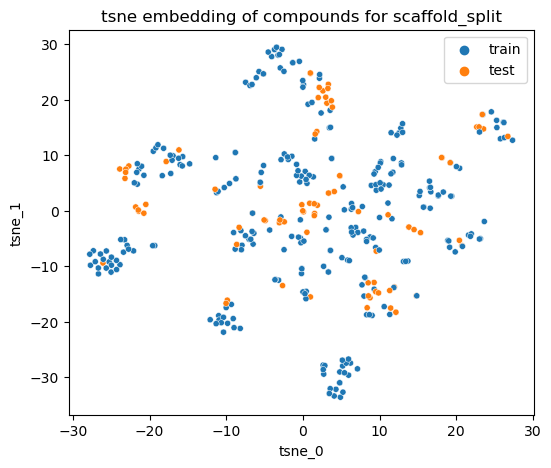

In [8]:
from utils import display_chemspace
data_name = "drewry_ret_wt_v804l_y791f_v1"
fig = display_chemspace(dataset.table.copy(), 'smiles', split =scaffold_split, 
                   split_name="scaffold_split")
method = "tnse"
save_figure(fig,remote_path=f"{FIGURE_DIR}/{data_name}_{method}_scaffold_split.png", 
            local_path=f"figures/{data_name}_{method}_scaffold_split.png" )

## Define multitask benchmarks for EGFR and L858R mutant with scaffold split

**Regression tasks**

In [9]:
benchmark_name ="drewry_ret_wt_v804l_y791f_multitask_reg_v1"
BENCHMARK_SAVE_DIR = f"{BENCHMARK_DIR}/{benchmark_name}"
data_cols = ['RET_(V804L_mutant)', 'RET_(Y791F_mutant)', 'RET']

benchmark_reg = MultiTaskBenchmarkSpecification(
    name=benchmark_name,
    dataset=dataset,
    target_cols=data_cols,
    input_cols="smiles",
    split=scaffold_split,
    main_metric="mean_squared_error",
    metrics=["mean_absolute_error",
            "mean_squared_error",
            "r2",
            "spearmanr",
            "pearsonr",
            "explained_var"],
    tags=['Kinase', 'HitDiscovery', 'Selectivity','Regression'], 
    description="Multitask classification benchmark for RET wild type, mutant V804L, and mutant Y791F.",
    owner=owner, 
    readme= load_readme(f"gs://polaris-public/readme/benchmarks/{benchmark_name}_readme.md")
)
path = benchmark_reg.to_json(BENCHMARK_SAVE_DIR)
print(path)

gs://polaris-public/benchmarks/kinases/ret/drewry_ret_wt_v804l_y791f_multitask_reg_v1/benchmark.json


**Classification task**

In [10]:
data_cols = ['CLASS_RET_(V804L_mutant)', 'CLASS_RET_(Y791F_mutant)', 'CLASS_RET']
benchmark_name ="drewry_ret_wt_v804l_y791f_multitask_clf_v1"
BENCHMARK_SAVE_DIR = f"{BENCHMARK_DIR}/{benchmark_name}"

benchmark_clf = MultiTaskBenchmarkSpecification(
    name=benchmark_name,
    dataset=dataset,
    target_cols=data_cols,
    input_cols="smiles",
    split=scaffold_split,
    main_metric="f1_macro",
    metrics=["accuracy", "f1_macro", "roc_auc", "pr_auc", "mcc", "cohen_kappa"],
    tags=['Kinase', 'HitDiscovery', 'Selectivity', 'Classification'],
    description="Multitask classification benchmark for RET wild type, mutant V804L, and mutant Y791F.",
    owner=owner, 
    readme= load_readme(f"gs://polaris-public/readme/benchmarks/{benchmark_name}_readme.md")
)
path = benchmark_clf.to_json(BENCHMARK_SAVE_DIR)
print(path)

gs://polaris-public/benchmarks/kinases/ret/drewry_ret_wt_v804l_y791f_multitask_clf_v1/benchmark.json
